In [1]:
from matplotlib import pyplot as plt

In [2]:
import numpy as np
from random import sample

In [3]:
from counter import counter

In [4]:
cc = counter('count2-pruned')

Loading count2-pruned from disk...


# year trends

In [5]:
mny = min(cc.items('fy'))
mxy = max(cc.items('fy'))

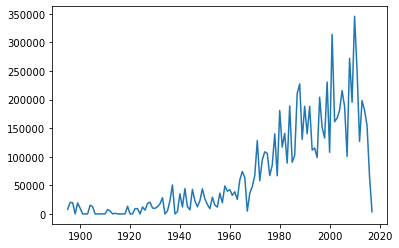

In [6]:
ys = range(mny, mxy+1)
cs = [cc(fy=y) for y in ys]

plt.plot(ys,cs);

# term year trends

In [7]:
terms = cc.items('t')
top_terms = sorted(terms, key=lambda x:-cc(t=x))[:10]

In [8]:
ys = range(1970, 2015)
tot_cs = np.array([cc(fy=y) for y in ys])
tot_cs[tot_cs==0] = 1 # for div 0

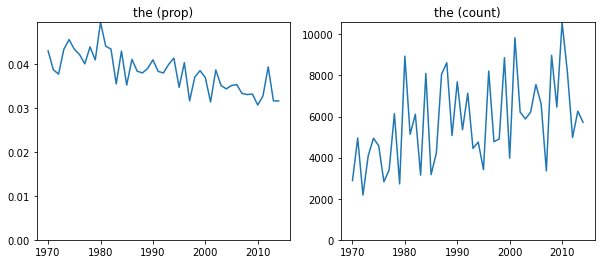

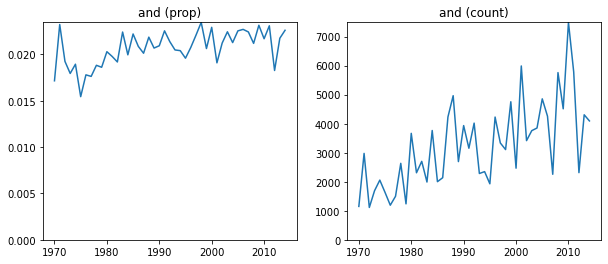

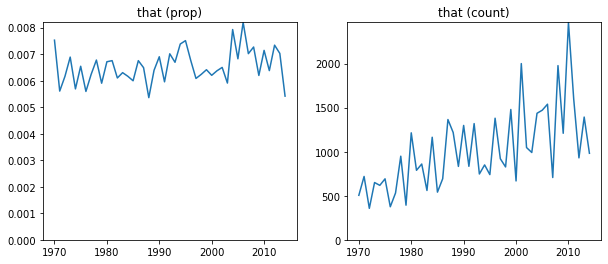

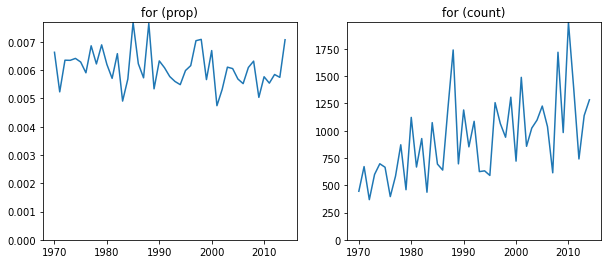

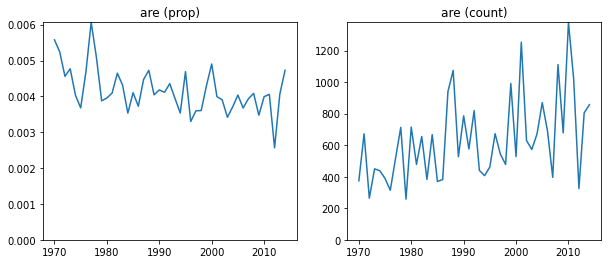

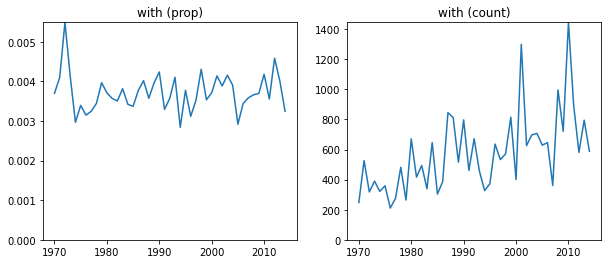

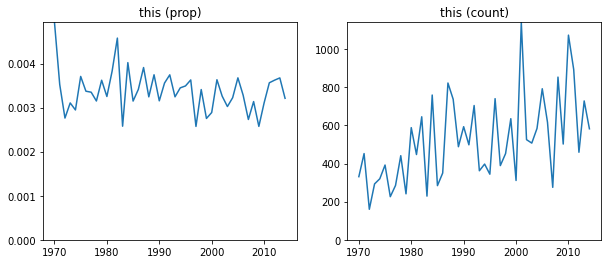

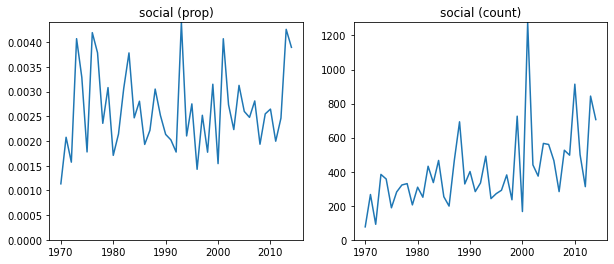

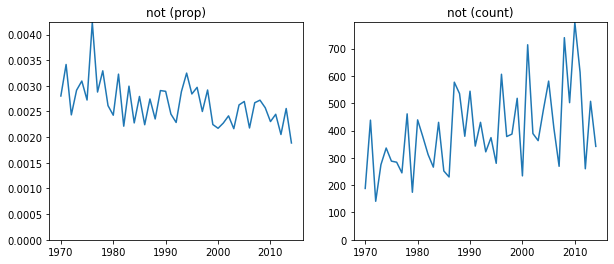

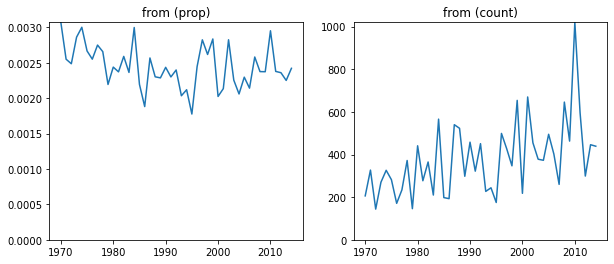

In [9]:
for t in top_terms:
    
    plt.figure(figsize=(10,4))
    
    plt.subplot(1,2,1)
    cs = np.array([cc(fy=y, t=t) for y in ys])
    plt.plot( ys,cs/tot_cs )
    plt.title(f'{t} (prop)')
    plt.ylim(0, np.max(cs/tot_cs))
    
    plt.subplot(1,2,2)
    plt.plot( ys,cs )
    plt.ylim(0, np.max(cs))
    plt.title(f'{t} (count)')
    plt.show()

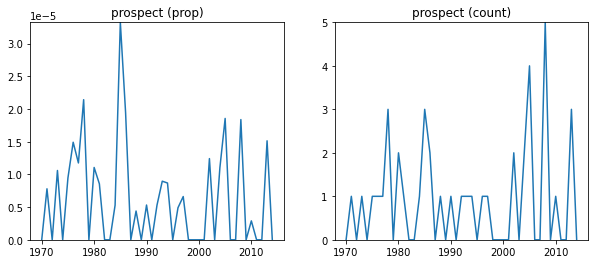

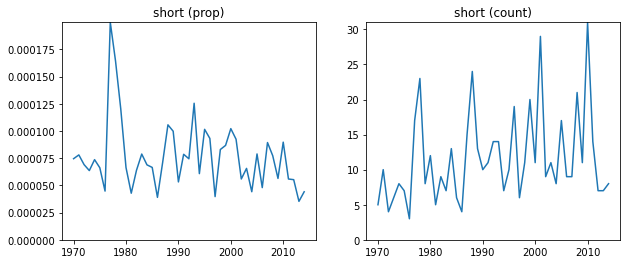

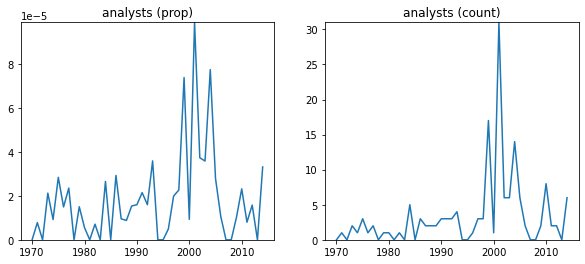

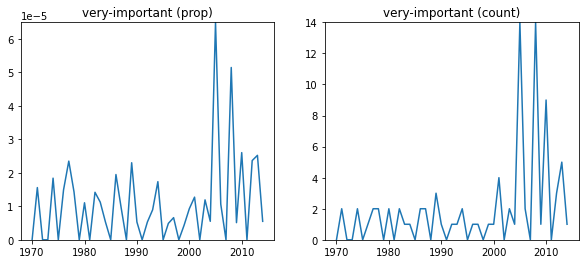

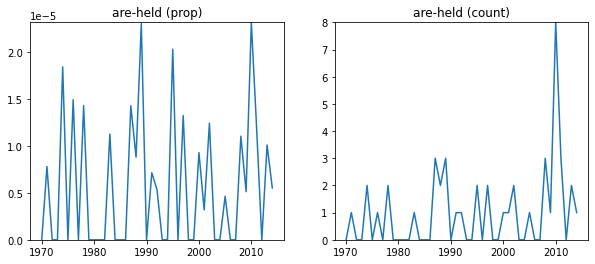

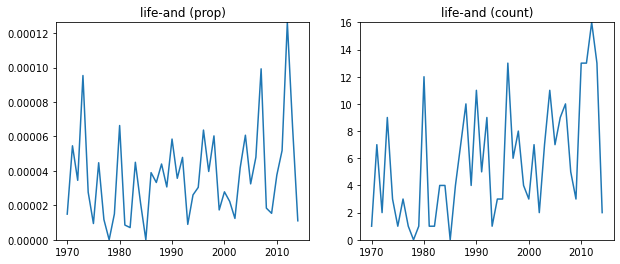

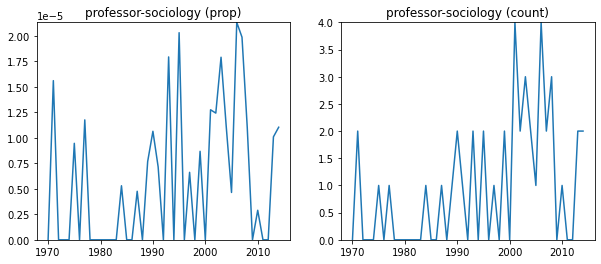

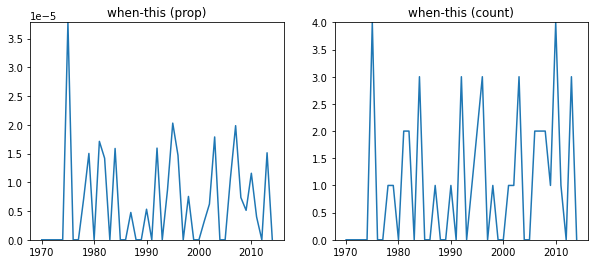

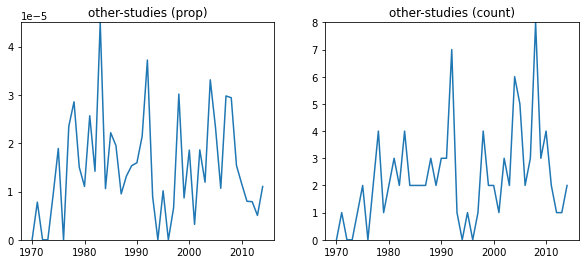

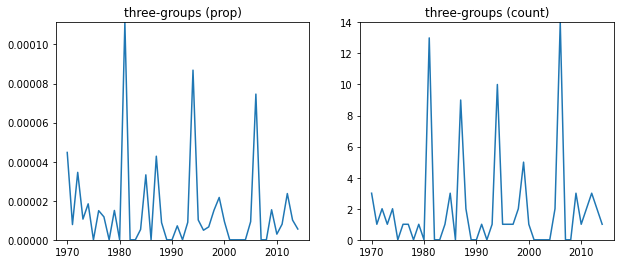

In [10]:
for t in sample(terms, 10):
    
    plt.figure(figsize=(10,4))
    
    plt.subplot(1,2,1)
    cs = np.array([cc(fy=y, t=t) for y in ys])
    plt.plot( ys,cs/tot_cs )
    plt.title(f'{t} (prop)')
    plt.ylim(0, np.max(cs/tot_cs))
    
    plt.subplot(1,2,2)
    plt.plot( ys,cs )
    plt.ylim(0, np.max(cs))
    plt.title(f'{t} (count)')
    plt.show()

# pruning for the first time. cool

In [ ]:
break

In [5]:
cc(t='social')

22677

In [7]:
# prune a bit before dumping it to disk
to_delete = [t for t in cc.items('t') if cc(t=t) < 50]

cc.delete('t', to_delete)
cc.prune_zeros()

Deleting 1.7M. Leaving 14,297.


In [8]:
cc(t='social')

22677

In [9]:
cc.save_counts('count2-pruned')

In [102]:
[(k, c.shape) for k,c in cc.counts.items()]

[(('fy', 't'), (104, 1700916)),
 (('fj', 't'), (45, 1700916)),
 (('fy',), (104,)),
 (('t',), (1700916,)),
 (('fj',), (45,))]